In [1]:
from pathlib import Path

In [2]:
sfam_dirs = sorted([d for d in Path.cwd().glob("*") if d.is_dir() and not d.stem.startswith(".")], key=lambda d:d.stem)

In [3]:
import pandas as pd
import torch

In [4]:
full_embeddings = None

In [5]:
for sfam_dir in sfam_dirs:
    embedding_path = sfam_dir / "latent-mean-mean.pt"
    embeddings_ = torch.load(embedding_path)
    embeddings_ = pd.DataFrame(
        embeddings_, 
        index=[f"1kq2A100_rot{i}" for i in range(500)], 
        columns=[f"{sfam_dir.name}_emb{i}" for i in range(1024)])
    if full_embeddings is None:
        full_embeddings = embeddings_
    else:
        full_embeddings = pd.concat((full_embeddings,embeddings_), axis=1)

In [6]:
full_embeddings

,1.10.10.10_emb0,1.10.10.10_emb1,1.10.10.10_emb2,1.10.10.10_emb3,1.10.10.10_emb4,1.10.10.10_emb5,1.10.10.10_emb6,1.10.10.10_emb7,1.10.10.10_emb8,1.10.10.10_emb9,...,3.90.79.10_emb1014,3.90.79.10_emb1015,3.90.79.10_emb1016,3.90.79.10_emb1017,3.90.79.10_emb1018,3.90.79.10_emb1019,3.90.79.10_emb1020,3.90.79.10_emb1021,3.90.79.10_emb1022,3.90.79.10_emb1023
1kq2A100_rot0,-0.019866,0.000522,-0.008836,0.010826,0.010341,-0.013100,0.004901,-0.008015,-0.019494,-0.003436,...,-0.009349,-0.012837,-0.031366,0.036947,-0.023530,-0.026316,0.081926,-0.057641,0.045026,-0.025889
1kq2A100_rot1,-0.000948,0.002762,-0.008790,-0.006143,-0.003324,0.011874,-0.006097,-0.000686,0.010818,-0.000579,...,-0.015473,0.036434,-0.042530,0.002126,0.007714,-0.018651,-0.048855,-0.026712,0.037868,-0.037640
1kq2A100_rot2,0.004877,-0.008562,0.005525,0.000015,-0.003644,0.012146,-0.008438,-0.001629,-0.005250,0.006511,...,-0.017412,-0.009516,-0.042725,0.015249,0.018893,-0.024876,0.028254,-0.030981,0.016298,0.036225
1kq2A100_rot3,-0.003956,-0.000196,-0.001358,-0.012789,-0.000823,-0.005228,0.018683,0.001556,-0.005119,-0.004467,...,-0.030026,0.005373,-0.009002,0.023249,0.016675,-0.051203,0.035010,-0.063588,0.022046,-0.018535
1kq2A100_rot4,0.002709,0.003444,-0.001265,-0.000640,0.006813,-0.000347,0.009941,-0.000919,-0.008185,-0.008850,...,0.010097,-0.031025,-0.033057,0.028097,0.004189,0.003075,0.013721,-0.122923,0.028725,-0.056311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1kq2A100_rot495,-0.029321,-0.001023,-0.010778,-0.002215,0.000015,-0.001990,-0.002358,-0.005971,-0.017641,0.002710,...,-0.019863,-0.020976,-0.040327,0.022774,0.010386,0.019116,0.067913,-0.058038,0.016520,0.011910
1kq2A100_rot496,0.020216,0.001998,0.004007,0.009637,0.001105,-0.010390,-0.011966,-0.007765,-0.004347,0.005528,...,0.019596,0.037521,0.015814,-0.019361,-0.053320,-0.047547,0.066228,-0.009207,0.003224,0.003284
1kq2A100_rot497,-0.002738,0.011971,0.000391,-0.006906,-0.002394,-0.002589,-0.002747,-0.018735,0.005982,0.002487,...,-0.017300,0.026550,-0.013122,0.059166,-0.017525,-0.060336,0.066071,-0.078329,-0.017350,-0.010461
1kq2A100_rot498,0.006223,0.014383,-0.002297,0.005664,0.004918,-0.007216,0.028118,-0.005610,-0.014622,0.015403,...,-0.055348,0.013331,-0.063345,0.000014,-0.022793,-0.020998,0.022735,-0.035075,-0.013753,-0.020473


In [7]:
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
raw_distances = pairwise_distances(full_embeddings.values, metric="cosine")

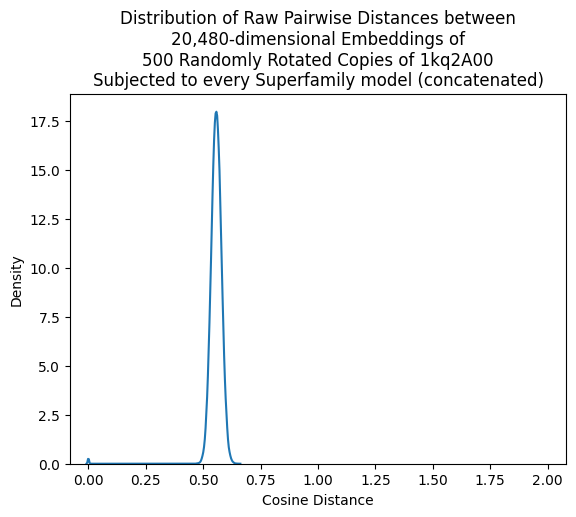

In [29]:
sns.kdeplot(raw_distances.flatten())
plt.xlim(-0.08,2.08)
#plt.title("Distribution of Raw 1024-Embedding Distances for\n500 Randomly Rotated Copies of 1kq2A00\nSubjected to every Superfamily model (concatenated)")
plt.title("Distribution of Raw Pairwise Distances between\n20,480-dimensional Embeddings of\n500 Randomly Rotated Copies of 1kq2A00\nSubjected to every Superfamily model (concatenated)")
plt.xlabel("Cosine Distance")
plt.savefig("1kq2A00_rotation_raw_embedding_distances_concat_model.pdf", dpi=600, bbox_inches="tight")
plt.savefig("1kq2A00_rotation_raw_embedding_distances_concat_model.png", dpi=600, bbox_inches="tight")

In [10]:
import pickle

In [11]:
with open("../../new_latent_spaze_viz_wide/COSINESIM--cosine-umap-reducer-model.pickle", "rb") as f:
    reducer = pickle.load(f)

In [12]:
reducer

UMAP(angular_rp_forest=True, metric='cosine', tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [13]:
dir(reducer)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_a',
 '_b',
 '_build_request_for_signature',
 '_check_custom_metric',
 '_check_feature_names',
 '_check_n_features',
 '_densmap_kwds',
 '_disconnection_distance',
 '_fit_embed_data',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_initial_alpha',
 '_input_distance_func',
 '_input_hash',
 '_inverse_distance_func',
 '_metric_kwds',
 '_more_tags',
 '_n_neighbors',
 '_original_n_threads',
 '_output_distance_func',
 '_output_metric_kwds',
 '_populate_combined_params',
 '_raw_data',
 '_repr_html

In [14]:
umap_embeddings = reducer.transform(full_embeddings.values)

In [15]:
umap_embeddings

array([[ -9.337877 ,  11.62791  ],
       [-10.961767 ,  11.19677  ],
       [ -8.877433 ,  11.488168 ],
       [ -8.8480015,  11.25038  ],
       [-11.736747 ,  10.526902 ],
       [ -8.624155 ,  11.357677 ],
       [-10.482984 ,  11.569462 ],
       [ -9.674193 ,  11.675434 ],
       [-11.408517 ,  10.74026  ],
       [ -8.624463 ,  11.218384 ],
       [-10.630649 ,  11.38841  ],
       [-11.525412 ,  10.369469 ],
       [ -8.167256 ,   9.186058 ],
       [-11.552965 ,  10.533826 ],
       [-10.612463 ,  11.350032 ],
       [ -8.228529 ,  11.122314 ],
       [ -9.07038  ,  11.417283 ],
       [-10.819794 ,  11.527226 ],
       [ -7.930667 ,  10.809219 ],
       [ -9.164996 ,  11.531544 ],
       [-11.757062 ,   9.529811 ],
       [-11.307983 ,   8.640951 ],
       [ -9.292227 ,  11.610451 ],
       [-11.539534 ,  10.50663  ],
       [-10.531463 ,  11.467063 ],
       [ -9.282497 ,  11.568846 ],
       [-10.637232 ,  11.463101 ],
       [-10.857342 ,  11.328451 ],
       [-11.3738365,

In [16]:
umap_distances = pairwise_distances(umap_embeddings, metric="cosine")

In [17]:
import numpy as np

In [18]:
pwd

'/home/bournelab/DeepUrfold-updated_results/test_rotations/all_vs_all'

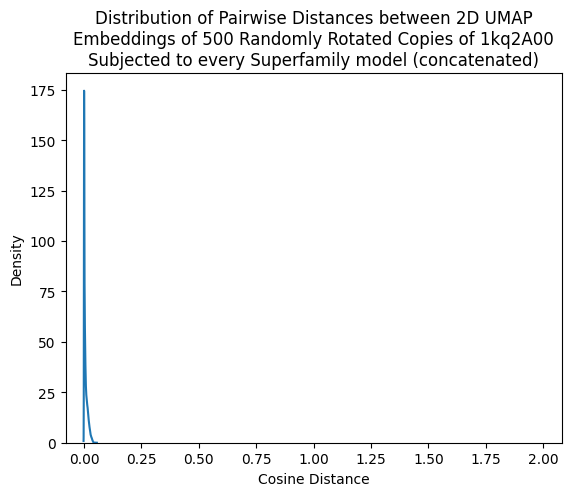

In [36]:
sns.kdeplot(umap_distances.flatten())
#plt.title("UMAP Embedding Distances between 500 rotations of 1kq2A00\nsubjected to the every Superfamily model")
#plt.title("Distribution of UMAP 2D Embedding Distances for\n500 Randomly Rotated Copies of 1kq2A00\nSubjected to every Superfamily model (concatenated)")
plt.title("Distribution of Pairwise Distances between 2D UMAP\nEmbeddings of 500 Randomly Rotated Copies of 1kq2A00\nSubjected to every Superfamily model (concatenated)")
plt.xlabel("Cosine Distance")
plt.xlim(-0.08,2.08)
plt.savefig("1kq2A00_rotation_umap_embedding_distances_concat_model.pdf", dpi=600, bbox_inches="tight")
plt.savefig("1kq2A00_rotation_umap_embedding_distances_concat_model.png", dpi=600, bbox_inches="tight")

In [20]:
with open("../../new_latent_spaze_viz_wide/pickle/UMAP_SH3_Pickle-umap-reducer-model.pickle", "rb") as f:
    sh3_reducer = pickle.load(f)

In [21]:
sh3_dir = [d for d in sfam_dirs if d.name=="2.30.30.100"][0]

In [22]:
sh3_dir

PosixPath('/home/bournelab/DeepUrfold-updated_results/test_rotations/all_vs_all/2.30.30.100')

In [23]:
sh3_dir/ "latent-mean-mean.pt"
sh3_embeddings = torch.load(embedding_path)
sh3_embeddings = pd.DataFrame(
    sh3_embeddings, 
    index=[f"1kq2A100_rot{i}" for i in range(500)], 
    columns=[f"2.30.30.100_emb{i}" for i in range(1024)])

In [24]:
sh3_embeddings

,2.30.30.100_emb0,2.30.30.100_emb1,2.30.30.100_emb2,2.30.30.100_emb3,2.30.30.100_emb4,2.30.30.100_emb5,2.30.30.100_emb6,2.30.30.100_emb7,2.30.30.100_emb8,2.30.30.100_emb9,...,2.30.30.100_emb1014,2.30.30.100_emb1015,2.30.30.100_emb1016,2.30.30.100_emb1017,2.30.30.100_emb1018,2.30.30.100_emb1019,2.30.30.100_emb1020,2.30.30.100_emb1021,2.30.30.100_emb1022,2.30.30.100_emb1023
1kq2A100_rot0,-0.016043,0.066735,-0.018544,-0.010632,-0.020414,0.010618,-0.024417,0.040343,-0.006698,0.020423,...,-0.009349,-0.012837,-0.031366,0.036947,-0.023530,-0.026316,0.081926,-0.057641,0.045026,-0.025889
1kq2A100_rot1,-0.048965,0.080332,-0.050028,0.018347,-0.044426,0.026831,-0.028710,0.024459,-0.029452,-0.003297,...,-0.015473,0.036434,-0.042530,0.002126,0.007714,-0.018651,-0.048855,-0.026712,0.037868,-0.037640
1kq2A100_rot2,-0.055902,0.028228,-0.016177,-0.013615,-0.014329,-0.009400,0.004142,0.059492,-0.026912,-0.017890,...,-0.017412,-0.009516,-0.042725,0.015249,0.018893,-0.024876,0.028254,-0.030981,0.016298,0.036225
1kq2A100_rot3,-0.048658,0.025799,-0.022378,-0.018726,-0.036955,-0.016855,0.000230,0.016995,0.012975,0.029611,...,-0.030026,0.005373,-0.009002,0.023249,0.016675,-0.051203,0.035010,-0.063588,0.022046,-0.018535
1kq2A100_rot4,-0.023700,0.035378,-0.016360,-0.024832,-0.052561,-0.011327,-0.052344,0.071057,0.017959,0.008854,...,0.010097,-0.031025,-0.033057,0.028097,0.004189,0.003075,0.013721,-0.122923,0.028725,-0.056311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1kq2A100_rot495,-0.015857,0.045691,-0.046795,-0.047162,-0.058395,0.018920,0.006328,0.007292,0.008618,-0.002280,...,-0.019863,-0.020976,-0.040327,0.022774,0.010386,0.019116,0.067913,-0.058038,0.016520,0.011910
1kq2A100_rot496,-0.060798,0.011333,-0.015369,-0.015485,-0.057558,0.018743,-0.022896,0.014007,-0.034448,0.054668,...,0.019596,0.037521,0.015814,-0.019361,-0.053320,-0.047547,0.066228,-0.009207,0.003224,0.003284
1kq2A100_rot497,-0.033788,0.026592,-0.040344,0.046890,-0.063795,0.023536,-0.028826,0.028826,0.052548,-0.009690,...,-0.017300,0.026550,-0.013122,0.059166,-0.017525,-0.060336,0.066071,-0.078329,-0.017350,-0.010461
1kq2A100_rot498,-0.025700,0.034917,-0.022995,-0.001334,-0.047328,0.035284,-0.040329,0.029782,-0.021555,-0.007629,...,-0.055348,0.013331,-0.063345,0.000014,-0.022793,-0.020998,0.022735,-0.035075,-0.013753,-0.020473


In [25]:
sh3_umap_distances = pairwise_distances(sh3_embeddings.values)

In [26]:
sh3_umap_distances

array([[0.       , 1.0121801, 0.9618362, ..., 1.1037728, 1.0551403,
        0.9749128],
       [1.0121801, 0.       , 1.0145186, ..., 1.036263 , 1.0006319,
        1.0318029],
       [0.9618362, 1.0145186, 0.       , ..., 1.1065323, 1.0342634,
        1.0431867],
       ...,
       [1.1037728, 1.036263 , 1.1065323, ..., 0.       , 1.1535829,
        1.0514961],
       [1.0551403, 1.0006319, 1.0342634, ..., 1.1535829, 0.       ,
        1.0905184],
       [0.9749128, 1.0318029, 1.0431867, ..., 1.0514961, 1.0905184,
        0.       ]], dtype=float32)

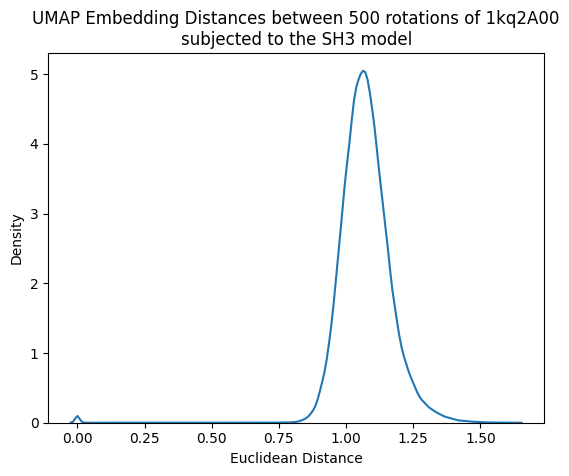

In [27]:
sns.kdeplot(sh3_umap_distances.flatten())
plt.title("UMAP Embedding Distances between 500 rotations of 1kq2A00\nsubjected to the SH3 model")
plt.xlabel("Euclidean Distance")
plt.savefig("1kq2A00_rotation_sh3_umap_embedding_distances.pdf")
plt.savefig("1kq2A00_rotation_sh3_umap_embedding_distances.png")